---
## 1. Import Libraries and Setup

In [4]:
# Install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud textblob -q

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import pickle
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)

# Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Download NLTK data
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## 2. Data Collection and Loading

In [6]:
# Load all datasets
print("Loading datasets...")

# Load Twitter Data
twitter_df = pd.read_csv('Twitter_Data.csv')
print(f"Twitter Data: {twitter_df.shape}")

# Load Reddit Data
reddit_df = pd.read_csv('Reddit_Data.csv')
print(f"Reddit Data: {reddit_df.shape}")

# Load Sentiment Data
sentiment_df = pd.read_csv('sentiment_data.csv')
print(f"Sentiment Data: {sentiment_df.shape}")

# Load Sentiment Dataset
sentiment_dataset_df = pd.read_csv('sentimentdataset.csv')
print(f"Sentiment Dataset: {sentiment_dataset_df.shape}")

print("\nAll datasets loaded successfully!")

Loading datasets...
Twitter Data: (162980, 2)
Reddit Data: (37249, 2)
Sentiment Data: (241145, 3)
Sentiment Dataset: (732, 15)

All datasets loaded successfully!


In [7]:
# Display first few rows of each dataset
print("=" * 50)
print("TWITTER DATA")
print("=" * 50)
display(twitter_df.head())
print(f"\nColumns: {twitter_df.columns.tolist()}")

TWITTER DATA


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0



Columns: ['clean_text', 'category']


In [8]:
print("=" * 50)
print("REDDIT DATA")
print("=" * 50)
display(reddit_df.head())
print(f"\nColumns: {reddit_df.columns.tolist()}")

REDDIT DATA


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1



Columns: ['clean_comment', 'category']


In [9]:
print("=" * 50)
print("SENTIMENT DATA")
print("=" * 50)
display(sentiment_df.head())
print(f"\nColumns: {sentiment_df.columns.tolist()}")

SENTIMENT DATA


,Unnamed: 0,Comment,Sentiment
0,0,lets forget apple pay required brand new iphon...,1
1,1,nz retailers don’t even contactless credit car...,0
2,2,forever acknowledge channel help lessons ideas...,2
3,3,whenever go place doesn’t take apple pay doesn...,0
4,4,apple pay convenient secure easy use used kore...,2



Columns: ['Unnamed: 0', 'Comment', 'Sentiment']


In [10]:
print("=" * 50)
print("SENTIMENT DATASET")
print("=" * 50)
display(sentiment_dataset_df.head())
print(f"\nColumns: {sentiment_dataset_df.columns.tolist()}")

SENTIMENT DATASET


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19



Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']


---
## 3. Data Preprocessing

In [11]:
# Check for missing values in all datasets
print("Missing Values Analysis")
print("=" * 50)

print("\nTwitter Data Missing Values:")
print(twitter_df.isnull().sum())

print("\nReddit Data Missing Values:")
print(reddit_df.isnull().sum())

print("\nSentiment Data Missing Values:")
print(sentiment_df.isnull().sum())

print("\nSentiment Dataset Missing Values:")
print(sentiment_dataset_df.isnull().sum())

Missing Values Analysis

Twitter Data Missing Values:
clean_text    4
category      7
dtype: int64

Reddit Data Missing Values:
clean_comment    100
category           0
dtype: int64

Sentiment Data Missing Values:
Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64

Sentiment Dataset Missing Values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [12]:
# Standardize and Combine All Four Datasets
print("=" * 60)
print("STANDARDIZING AND MERGING ALL DATASETS")
print("=" * 60)

# ============================================
# 1. PREPARE TWITTER DATA
# ============================================
print("\n1. Processing Twitter Data...")
twitter_processed = twitter_df[['clean_text', 'category']].copy()
twitter_processed.columns = ['text', 'sentiment']
# Remove NaN values BEFORE processing
twitter_processed = twitter_processed.dropna(subset=['text', 'sentiment'])
twitter_processed['source'] = 'Twitter'
print(f"   Shape: {twitter_processed.shape}")
print(f"   Sentiment values: {sorted(twitter_processed['sentiment'].unique())}")

# ============================================
# 2. PREPARE REDDIT DATA
# ============================================
print("\n2. Processing Reddit Data...")
reddit_processed = reddit_df[['clean_comment', 'category']].copy()
reddit_processed.columns = ['text', 'sentiment']
# Remove NaN values
reddit_processed = reddit_processed.dropna(subset=['text', 'sentiment'])
reddit_processed['source'] = 'Reddit'
print(f"   Shape: {reddit_processed.shape}")
print(f"   Sentiment values: {sorted(reddit_processed['sentiment'].unique())}")

# ============================================
# 3. PREPARE SENTIMENT DATA (sentiment_data.csv)
# ============================================
print("\n3. Processing Sentiment Data...")
sentiment_processed = sentiment_df[['Comment', 'Sentiment']].copy()
sentiment_processed.columns = ['text', 'sentiment']
# Remove NaN values
sentiment_processed = sentiment_processed.dropna(subset=['text', 'sentiment'])
sentiment_processed['source'] = 'Sentiment_Data'
# sentiment_data: 0 (Negative), 1 (Neutral), 2 (Positive)
# Convert to standard format: -1, 0, 1
sentiment_mapping_1 = {0: -1, 1: 0, 2: 1}
sentiment_processed['sentiment'] = sentiment_processed['sentiment'].map(sentiment_mapping_1)
print(f"   Shape: {sentiment_processed.shape}")
print(f"   Sentiment values after mapping: {sorted(sentiment_processed['sentiment'].unique())}")

# ============================================
# 4. PREPARE SENTIMENT DATASET (sentimentdataset.csv)
# ============================================
print("\n4. Processing Sentiment Dataset...")
sentiment_dataset_processed = sentiment_dataset_df[['Text', 'Sentiment']].copy()
sentiment_dataset_processed.columns = ['text', 'sentiment']
# Remove NaN values
sentiment_dataset_processed = sentiment_dataset_processed.dropna(subset=['text', 'sentiment'])
sentiment_dataset_processed['source'] = 'Sentiment_Dataset'
# sentimentdataset: 'Positive', 'Negative', 'Neutral' (text labels)
# Convert to standard format: -1, 0, 1
sentiment_mapping_2 = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
sentiment_dataset_processed['sentiment'] = sentiment_dataset_processed['sentiment'].str.strip().map(sentiment_mapping_2)
# Remove any rows where mapping failed
sentiment_dataset_processed = sentiment_dataset_processed.dropna(subset=['sentiment'])
print(f"   Shape: {sentiment_dataset_processed.shape}")
print(f"   Sentiment values after mapping: {sorted(sentiment_dataset_processed['sentiment'].unique())}")

print("\n" + "=" * 60)
print("All datasets standardized to format: -1 (Negative), 0 (Neutral), 1 (Positive)")
print("=" * 60)

STANDARDIZING AND MERGING ALL DATASETS

1. Processing Twitter Data...
   Shape: (162969, 3)
   Sentiment values: [np.float64(-1.0), np.float64(0.0), np.float64(1.0)]

2. Processing Reddit Data...
   Shape: (37149, 3)
   Sentiment values: [np.int64(-1), np.int64(0), np.int64(1)]

3. Processing Sentiment Data...
   Shape: (240928, 3)
   Sentiment values after mapping: [np.int64(-1), np.int64(0), np.int64(1)]

4. Processing Sentiment Dataset...
   Shape: (67, 3)
   Sentiment values after mapping: [np.float64(-1.0), np.float64(0.0), np.float64(1.0)]

All datasets standardized to format: -1 (Negative), 0 (Neutral), 1 (Positive)


In [13]:
# ============================================
# MERGE ALL DATASETS INTO SINGLE UNIFIED DATASET
# ============================================
print("=" * 60)
print("MERGING ALL DATASETS")
print("=" * 60)

# Combine all processed datasets
combined_df = pd.concat([
    twitter_processed,
    reddit_processed,
    sentiment_processed,
    sentiment_dataset_processed
], ignore_index=True)

print(f"\nCombined Dataset Shape: {combined_df.shape}")
print(f"\nData from each source:")
print(combined_df['source'].value_counts())

print(f"\nSentiment Distribution (Before Cleaning):")
print(combined_df['sentiment'].value_counts().sort_index())

# Display sample
print("\nSample of Combined Data:")
display(combined_df.sample(5))

MERGING ALL DATASETS

Combined Dataset Shape: (441113, 3)

Data from each source:
source
Sentiment_Data       240928
Twitter              162969
Reddit                37149
Sentiment_Dataset        67
Name: count, dtype: int64

Sentiment Distribution (Before Cleaning):
sentiment
-1.0     98895
 0.0    151048
 1.0    191170
Name: count, dtype: int64

Sample of Combined Data:


,text,sentiment,source
221151,try play john travoltas grease lightning bassl...,1.0,Sentiment_Data
338079,biggest achievement showing indias scientific ...,1.0,Sentiment_Data
294785,âthe indian election like festivalâinterna...,0.0,Sentiment_Data
194928,these politicians want dumb and boring them he...,-1.0,Reddit
205436,yeah huntsman spiders relatively friendly stil...,-1.0,Sentiment_Data


In [14]:
# ============================================
# DATA CLEANING AND QUALITY IMPROVEMENT
# ============================================
print("=" * 60)
print("DATA CLEANING AND QUALITY CHECKS")
print("=" * 60)

# 1. Check initial state
print(f"\n1. Initial Dataset Shape: {combined_df.shape}")

# 2. Remove rows with missing text
print(f"\n2. Handling Missing Values:")
print(f"   Missing 'text': {combined_df['text'].isnull().sum()}")
print(f"   Missing 'sentiment': {combined_df['sentiment'].isnull().sum()}")
combined_df = combined_df.dropna(subset=['text', 'sentiment'])
print(f"   After removing missing values: {combined_df.shape}")

# 3. Remove duplicates
print(f"\n3. Removing Duplicates:")
print(f"   Duplicates found: {combined_df.duplicated(subset=['text']).sum()}")
combined_df = combined_df.drop_duplicates(subset=['text'])
print(f"   After removing duplicates: {combined_df.shape}")

# 4. Remove empty or very short texts
print(f"\n4. Removing Empty/Short Texts:")
combined_df['text'] = combined_df['text'].astype(str)
combined_df = combined_df[combined_df['text'].str.len() > 10]
print(f"   After removing short texts: {combined_df.shape}")

# 5. Convert sentiment to integer
combined_df['sentiment'] = combined_df['sentiment'].astype(int)

# 6. Verify sentiment values are valid (-1, 0, 1)
print(f"\n5. Verifying Sentiment Values:")
print(f"   Unique sentiment values: {sorted(combined_df['sentiment'].unique())}")
valid_sentiments = combined_df['sentiment'].isin([-1, 0, 1])
combined_df = combined_df[valid_sentiments]
print(f"   After validation: {combined_df.shape}")

# 7. Reset index
combined_df = combined_df.reset_index(drop=True)

print(f"\n" + "=" * 60)
print(f"FINAL MERGED DATASET SHAPE: {combined_df.shape}")
print("=" * 60)

DATA CLEANING AND QUALITY CHECKS

1. Initial Dataset Shape: (441113, 3)

2. Handling Missing Values:
   Missing 'text': 0
   Missing 'sentiment': 0
   After removing missing values: (441113, 3)

3. Removing Duplicates:
   Duplicates found: 30094
   After removing duplicates: (411019, 3)

4. Removing Empty/Short Texts:
   After removing short texts: (406955, 3)

5. Verifying Sentiment Values:
   Unique sentiment values: [np.int64(-1), np.int64(0), np.int64(1)]
   After validation: (406955, 3)

FINAL MERGED DATASET SHAPE: (406955, 3)


In [15]:
# ============================================
# SAVE MERGED DATASET TO CSV
# ============================================
print("=" * 60)
print("SAVING MERGED DATASET")
print("=" * 60)

# Save the merged and cleaned dataset
combined_df.to_csv('merged_sentiment_dataset.csv', index=False)
print("Merged dataset saved as 'merged_sentiment_dataset.csv'")

SAVING MERGED DATASET
Merged dataset saved as 'merged_sentiment_dataset.csv'


In [16]:
# Display final dataset info
print(f"\nFinal Dataset Summary:")
print(f"  - Total Samples: {len(combined_df)}")
print(f"  - Columns: {combined_df.columns.tolist()}")
print(f"\nData Distribution by Source:")
print(combined_df['source'].value_counts())
print(f"\nSentiment Distribution:")
print(combined_df['sentiment'].value_counts().sort_index())
print("\n  -1: Negative")
print("   0: Neutral")
print("   1: Positive")


Final Dataset Summary:
  - Total Samples: 406955
  - Columns: ['text', 'sentiment', 'source']

Data Distribution by Source:
source
Sentiment_Data       208728
Twitter              162405
Reddit                35755
Sentiment_Dataset        67
Name: count, dtype: int64

Sentiment Distribution:
sentiment
-1     91220
 0    135171
 1    180564
Name: count, dtype: int64

  -1: Negative
   0: Neutral
   1: Positive


In [17]:
# Display sample of final dataset
print("\n" + "=" * 60)
print("SAMPLE OF FINAL MERGED DATASET")
print("=" * 60)
display(combined_df.head(10))


SAMPLE OF FINAL MERGED DATASET


,text,sentiment,source
0,when modi promised “minimum government maximum...,-1,Twitter
1,talk all the nonsense and continue all the dra...,0,Twitter
2,what did just say vote for modi welcome bjp t...,1,Twitter
3,asking his supporters prefix chowkidar their n...,1,Twitter
4,answer who among these the most powerful world...,1,Twitter
5,kiya tho refresh maarkefir comment karo,0,Twitter
6,surat women perform yagna seeks divine grace f...,0,Twitter
7,this comes from cabinet which has scholars lik...,0,Twitter
8,with upcoming election india saga going import...,1,Twitter
9,gandhi was gay does modi,1,Twitter


In [18]:
# Text Preprocessing Functions
def clean_text(text):
    """
    Clean and preprocess text data
    """
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Advanced text preprocessing with tokenization and lemmatization
    """
    # Clean text
    text = clean_text(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens
              if token not in stop_words and len(token) > 2]

    return ' '.join(tokens)

print("Text preprocessing functions defined!")

Text preprocessing functions defined!


In [19]:
# Apply preprocessing
print("Applying text preprocessing... (this may take a few minutes)")
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Remove empty texts after preprocessing
combined_df = combined_df[combined_df['cleaned_text'].str.len() > 0]
print(f"Final dataset shape: {combined_df.shape}")

Applying text preprocessing... (this may take a few minutes)
Final dataset shape: (406580, 4)


In [20]:
# Display sample preprocessed data
print("Sample of preprocessed data:")
display(combined_df[['text', 'cleaned_text', 'sentiment', 'source']].head(10))

Sample of preprocessed data:


,text,cleaned_text,sentiment,source
0,when modi promised “minimum government maximum...,modi promised minimum government maximum gover...,-1,Twitter
1,talk all the nonsense and continue all the dra...,talk nonsense continue drama vote modi,0,Twitter
2,what did just say vote for modi welcome bjp t...,say vote modi welcome bjp told rahul main camp...,1,Twitter
3,asking his supporters prefix chowkidar their n...,asking supporter prefix chowkidar name modi gr...,1,Twitter
4,answer who among these the most powerful world...,answer among powerful world leader today trump...,1,Twitter
5,kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo,0,Twitter
6,surat women perform yagna seeks divine grace f...,surat woman perform yagna seek divine grace na...,0,Twitter
7,this comes from cabinet which has scholars lik...,come cabinet scholar like modi smriti hema tim...,0,Twitter
8,with upcoming election india saga going import...,upcoming election india saga going important p...,1,Twitter
9,gandhi was gay does modi,gandhi gay modi,1,Twitter


In [21]:
# ============================================
# CREATE SENTIMENT LABELS FOR VISUALIZATION
# ============================================
# Map numeric sentiment to categorical labels
def map_sentiment_label(sentiment):
    if sentiment == -1:
        return 'Negative'
    elif sentiment == 0:
        return 'Neutral'
    elif sentiment == 1:
        return 'Positive'
    else:
        return 'Unknown'

combined_df['sentiment_label'] = combined_df['sentiment'].apply(map_sentiment_label)

print("Sentiment Label Distribution:")
print("=" * 40)
print(combined_df['sentiment_label'].value_counts())
print(f"\nPercentage Distribution:")
print(combined_df['sentiment_label'].value_counts(normalize=True).round(3) * 100)

Sentiment Label Distribution:
sentiment_label
Positive    180530
Neutral     134841
Negative     91209
Name: count, dtype: int64

Percentage Distribution:
sentiment_label
Positive    44.4
Neutral     33.2
Negative    22.4
Name: proportion, dtype: float64


---
## 4. Exploratory Data Analysis (EDA)

In [22]:
# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
fig_size = (12, 6)

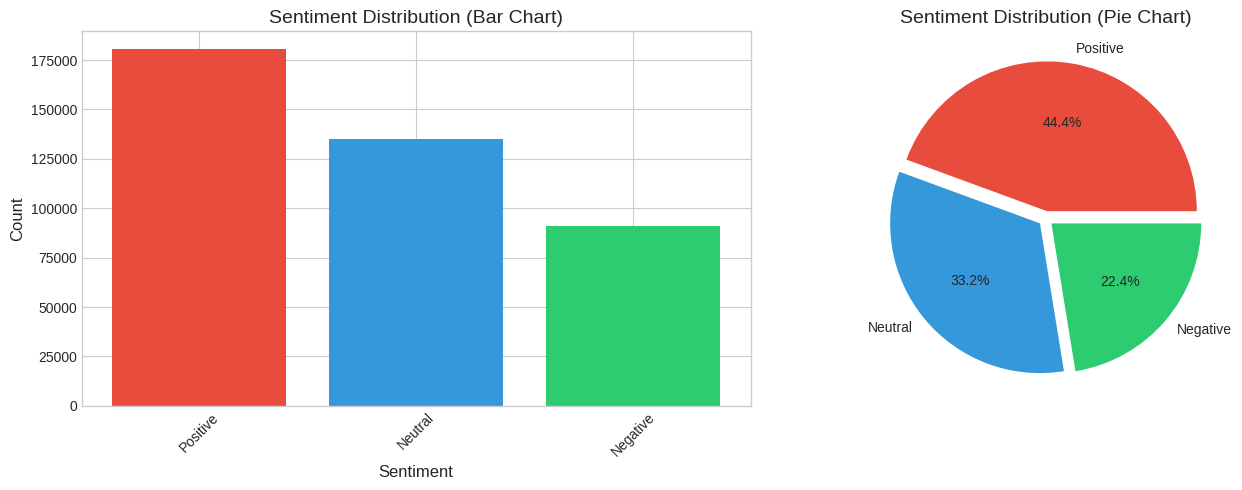

In [23]:
# 4.1 Sentiment Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sentiment_counts = combined_df['sentiment_label'].value_counts()
colors = ['#e74c3c', '#3498db', '#2ecc71', '#27ae60']
axes[0].bar(sentiment_counts.index, sentiment_counts.values, color=colors[:len(sentiment_counts)])
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Sentiment Distribution (Bar Chart)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
            colors=colors[:len(sentiment_counts)], explode=[0.05]*len(sentiment_counts))
axes[1].set_title('Sentiment Distribution (Pie Chart)', fontsize=14)

plt.tight_layout()
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

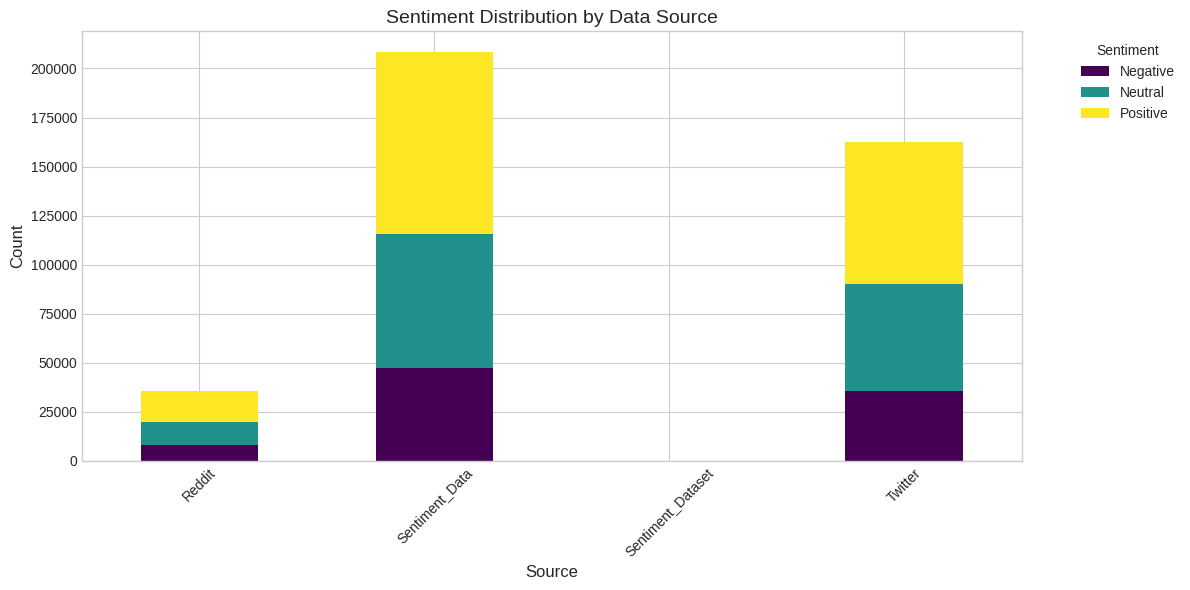

In [24]:
# 4.2 Sentiment Distribution by Source
plt.figure(figsize=(12, 6))
source_sentiment = pd.crosstab(combined_df['source'], combined_df['sentiment_label'])
source_sentiment.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.xlabel('Source', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment Distribution by Data Source', fontsize=14)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sentiment_by_source.png', dpi=300, bbox_inches='tight')
plt.show()

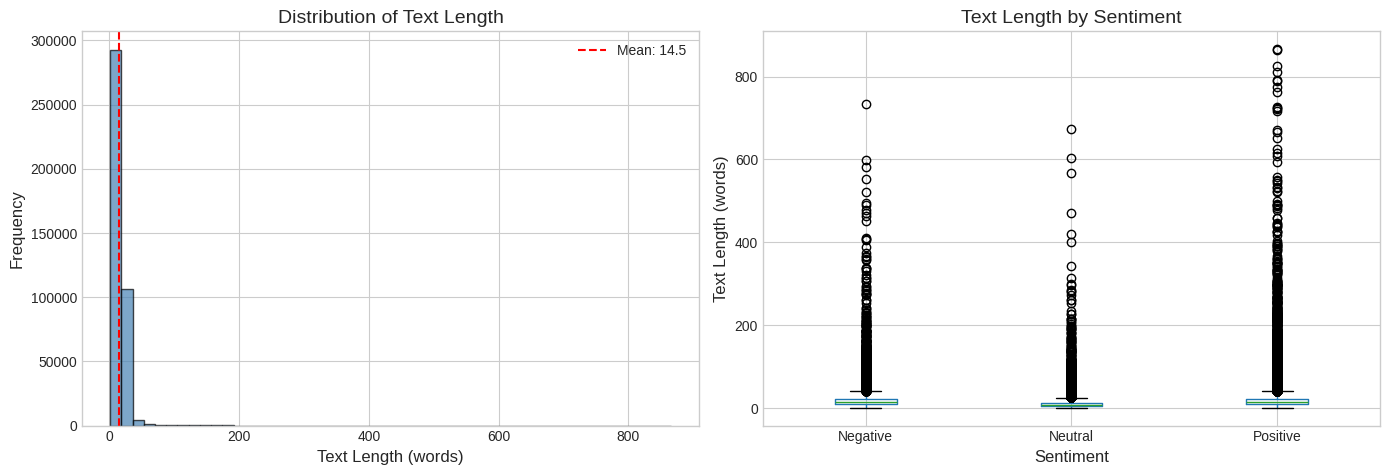

In [25]:
# 4.3 Text Length Analysis
combined_df['text_length'] = combined_df['cleaned_text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(combined_df['text_length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Text Length (words)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Text Length', fontsize=14)
axes[0].axvline(combined_df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {combined_df["text_length"].mean():.1f}')
axes[0].legend()

# Box plot by sentiment
combined_df.boxplot(column='text_length', by='sentiment_label', ax=axes[1])
axes[1].set_xlabel('Sentiment', fontsize=12)
axes[1].set_ylabel('Text Length (words)', fontsize=12)
axes[1].set_title('Text Length by Sentiment', fontsize=14)
plt.suptitle('')

plt.tight_layout()
plt.savefig('text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

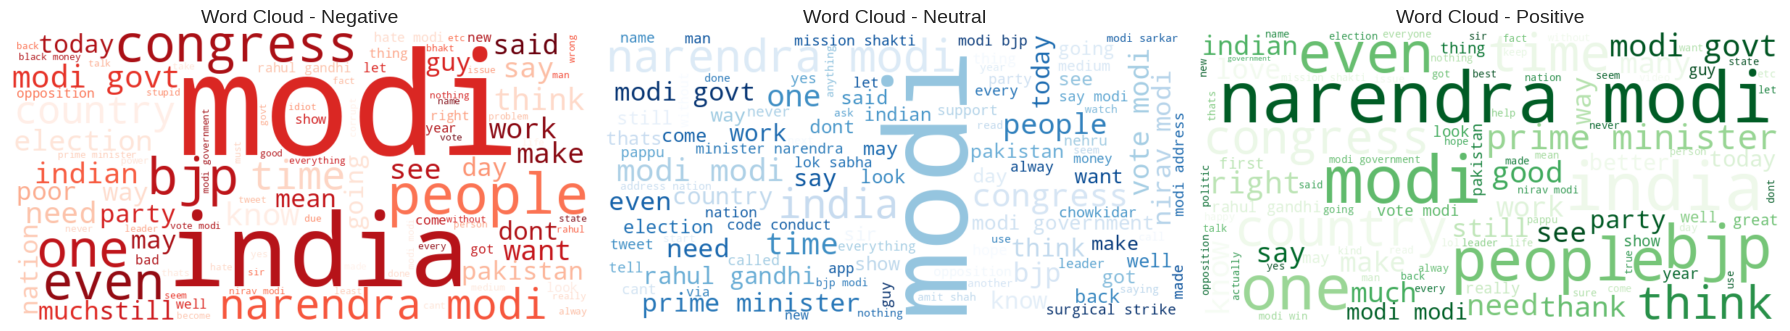

In [26]:
# 4.4 Word Clouds for Each Sentiment
# Get only the sentiments that exist in the data
sentiment_labels = ['Negative', 'Neutral', 'Positive']
existing_sentiments = [s for s in sentiment_labels if s in combined_df['sentiment_label'].values]

# Create subplots based on number of existing sentiments
n_sentiments = len(existing_sentiments)
fig, axes = plt.subplots(1, n_sentiments, figsize=(6*n_sentiments, 5))

# Handle case when there's only one sentiment
if n_sentiments == 1:
    axes = [axes]

colors_wc = {'Negative': 'Reds', 'Neutral': 'Blues', 'Positive': 'Greens'}

for idx, sentiment in enumerate(existing_sentiments):
    text = ' '.join(combined_df[combined_df['sentiment_label'] == sentiment]['cleaned_text'].tolist())
    if text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color='white',
                              colormap=colors_wc.get(sentiment, 'viridis'),
                              max_words=100).generate(text)
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(f'Word Cloud - {sentiment}', fontsize=14)
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

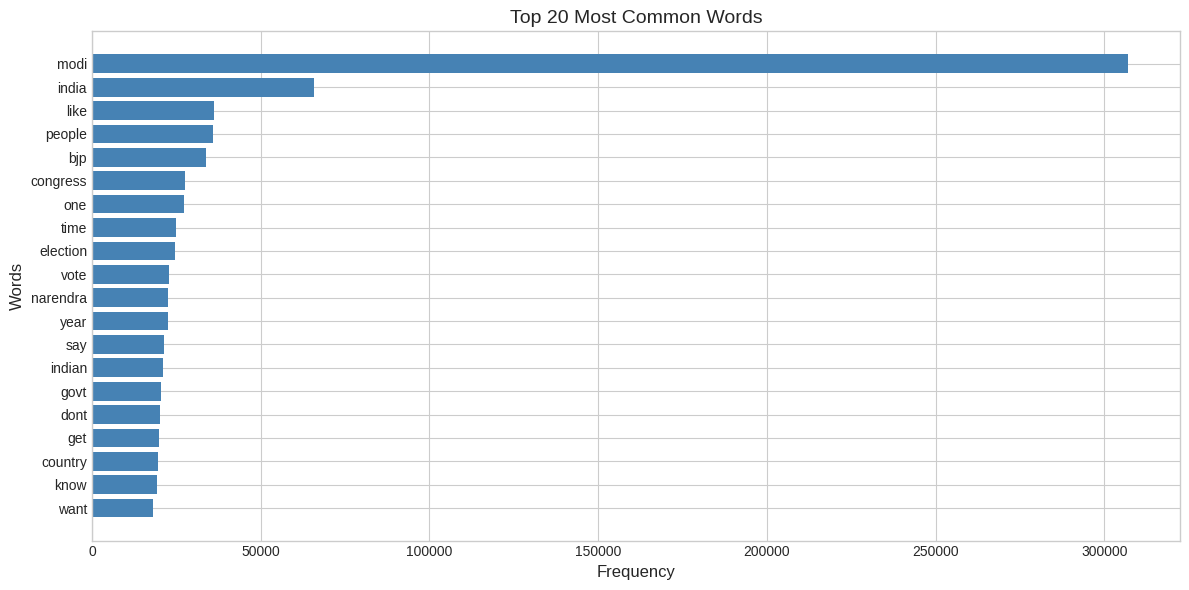

In [27]:
# 4.5 Most Common Words Analysis
from collections import Counter

def get_top_words(texts, n=20):
    """Get top n most common words"""
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Overall top words
top_words = get_top_words(combined_df['cleaned_text'], 20)

plt.figure(figsize=(12, 6))
words, counts = zip(*top_words)
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top 20 Most Common Words', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_words.png', dpi=300, bbox_inches='tight')
plt.show()

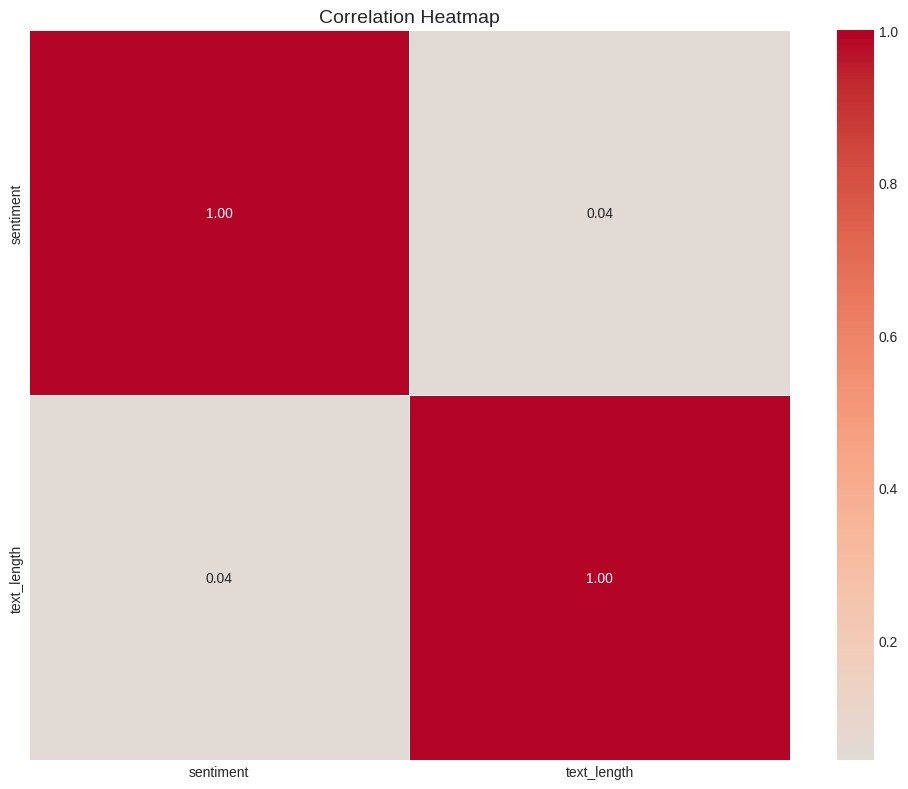

In [28]:
# 4.6 Correlation Heatmap (for numerical features)
numerical_cols = combined_df.select_dtypes(include=[np.number]).columns.tolist()
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = combined_df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

In [29]:
# 4.7 Statistical Summary
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)

print(f"\nTotal Samples: {len(combined_df)}")
print(f"\nText Length Statistics:")
print(combined_df['text_length'].describe())

print(f"\nSentiment Distribution:")
print(combined_df['sentiment_label'].value_counts(normalize=True).round(3) * 100)

STATISTICAL SUMMARY

Total Samples: 406580

Text Length Statistics:
count    406580.000000
mean         14.454727
std          14.360321
min           1.000000
25%           7.000000
50%          12.000000
75%          20.000000
max         866.000000
Name: text_length, dtype: float64

Sentiment Distribution:
sentiment_label
Positive    44.4
Neutral     33.2
Negative    22.4
Name: proportion, dtype: float64


---
## 5. Feature Engineering and Data Preparation for Modeling

In [30]:
# ============================================
# PREPARE DATA FOR MODELING
# ============================================
print("=" * 60)
print("PREPARING DATA FOR MACHINE LEARNING")
print("=" * 60)

# Convert sentiment to 3-class format (0, 1, 2) for sklearn
# -1 -> 0 (Negative), 0 -> 1 (Neutral), 1 -> 2 (Positive)
def convert_sentiment_class(sentiment):
    if sentiment == -1:
        return 0  # Negative
    elif sentiment == 0:
        return 1  # Neutral
    else:  # 1
        return 2  # Positive

combined_df['sentiment_class'] = combined_df['sentiment'].apply(convert_sentiment_class)

print("\nSentiment Class Mapping:")
print("  Original -1 → Class 0 (Negative)")
print("  Original  0 → Class 1 (Neutral)")
print("  Original  1 → Class 2 (Positive)")

print("\nSentiment Class Distribution:")
print(combined_df['sentiment_class'].value_counts().sort_index())

# Verify balance
print("\nClass Balance:")
for cls, label in zip([0, 1, 2], ['Negative', 'Neutral', 'Positive']):
    count = (combined_df['sentiment_class'] == cls).sum()
    pct = count / len(combined_df) * 100
    print(f"  Class {cls} ({label}): {count:,} samples ({pct:.1f}%)")

PREPARING DATA FOR MACHINE LEARNING

Sentiment Class Mapping:
  Original -1 → Class 0 (Negative)
  Original  0 → Class 1 (Neutral)
  Original  1 → Class 2 (Positive)

Sentiment Class Distribution:
sentiment_class
0     91209
1    134841
2    180530
Name: count, dtype: int64

Class Balance:
  Class 0 (Negative): 91,209 samples (22.4%)
  Class 1 (Neutral): 134,841 samples (33.2%)
  Class 2 (Positive): 180,530 samples (44.4%)


In [31]:
# Split data into features and target
X = combined_df['cleaned_text']
y = combined_df['sentiment_class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 325264
Test set size: 81316


In [32]:
# Feature Extraction using TF-IDF
print("Extracting TF-IDF features...")

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                                    min_df=2, max_df=0.95)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF Feature Shape: {X_train_tfidf.shape}")

Extracting TF-IDF features...
TF-IDF Feature Shape: (325264, 5000)


---
## 6. Sentiment Prediction Model Development

In [33]:
# Define models to compare (using 4 efficient models)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB(),
    'SGD Classifier': SGDClassifier(loss='hinge', random_state=42, max_iter=1000),
    'LinearSVC': LinearSVC(random_state=42, max_iter=1000)
}

print(f"Models to train: {list(models.keys())}")

Models to train: ['Logistic Regression', 'Naive Bayes', 'SGD Classifier', 'LinearSVC']


In [34]:
# Train and evaluate all models
print("=" * 60)
print("MODEL TRAINING")
print("=" * 60)

results = {}
trained_models = {}

model_list = list(models.items())
total_models = len(model_list)

for i, (name, model) in enumerate(model_list, 1):
    print(f"\n[{i}/{total_models}] Training {name}...")

    # Train model
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model

    # Predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"    Accuracy: {accuracy:.4f}")
    print(f"    F1-Score: {f1:.4f}")

print("\n" + "=" * 60)
print(f"All {total_models} models trained successfully!")
print("=" * 60)

MODEL TRAINING

[1/4] Training Logistic Regression...
    Accuracy: 0.8362
    F1-Score: 0.8350

[2/4] Training Naive Bayes...
    Accuracy: 0.6938
    F1-Score: 0.6836

[3/4] Training SGD Classifier...
    Accuracy: 0.7942
    F1-Score: 0.7898

[4/4] Training LinearSVC...
    Accuracy: 0.8353
    F1-Score: 0.8342

All 4 models trained successfully!


---
## 7. Model Evaluation and Comparative Analysis

In [35]:
# Create comparison dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('F1-Score', ascending=False)

print("=" * 60)
print("MODEL COMPARISON RESULTS")
print("=" * 60)
display(results_df.round(4))

MODEL COMPARISON RESULTS


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.8362,0.8376,0.8362,0.8350
LinearSVC,0.8353,0.8374,0.8353,0.8342
SGD Classifier,0.7942,0.8054,0.7942,0.7898
Naive Bayes,0.6938,0.7133,0.6938,0.6836


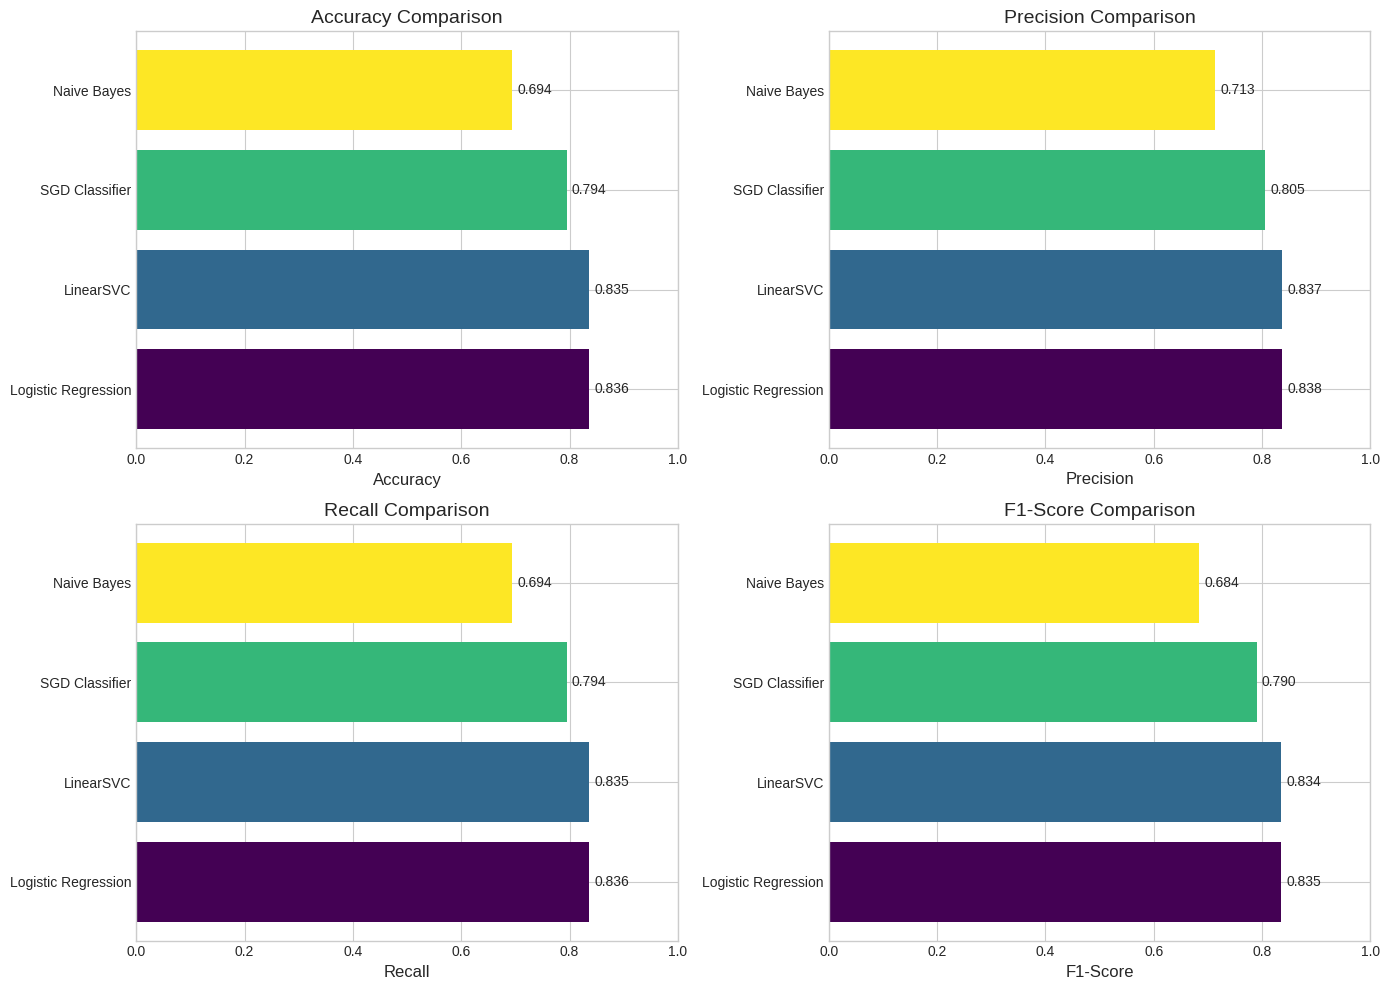

In [36]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = plt.cm.viridis(np.linspace(0, 1, len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    bars = ax.barh(results_df.index, results_df[metric], color=colors)
    ax.set_xlabel(metric, fontsize=12)
    ax.set_title(f'{metric} Comparison', fontsize=14)
    ax.set_xlim(0, 1)

    # Add value labels
    for bar, val in zip(bars, results_df[metric]):
        ax.text(val + 0.01, bar.get_y() + bar.get_height()/2,
                f'{val:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Find the best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")


Best Model: Logistic Regression
F1-Score: 0.8350


In [38]:
# Detailed evaluation of the best model
y_pred_best = best_model.predict(X_test_tfidf)

print("=" * 60)
print(f"DETAILED CLASSIFICATION REPORT - {best_model_name}")
print("=" * 60)

target_names = ['Negative', 'Neutral', 'Positive']
print(classification_report(y_test, y_pred_best, target_names=target_names))

DETAILED CLASSIFICATION REPORT - Logistic Regression
              precision    recall  f1-score   support

    Negative       0.82      0.71      0.76     18242
     Neutral       0.80      0.90      0.84     26968
    Positive       0.88      0.86      0.87     36106

    accuracy                           0.84     81316
   macro avg       0.83      0.82      0.82     81316
weighted avg       0.84      0.84      0.83     81316



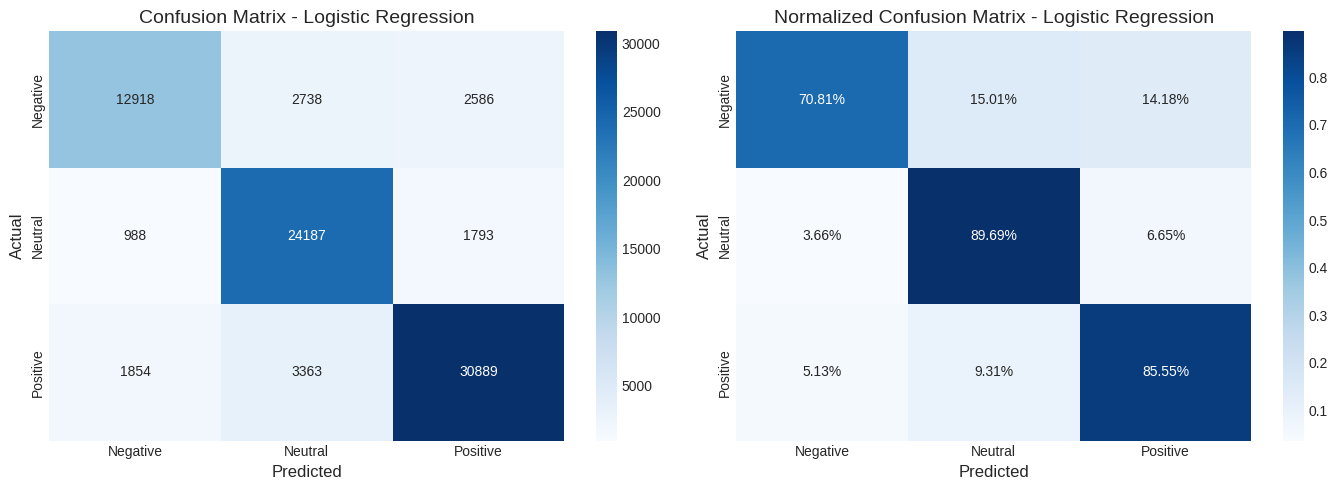

In [39]:
# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion matrix for best model
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=target_names, yticklabels=target_names)
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14)

# Normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=target_names, yticklabels=target_names)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_title(f'Normalized Confusion Matrix - {best_model_name}', fontsize=14)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Cross-validation for best model
print(f"\nCross-Validation Results for {best_model_name}:")
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5, scoring='f1_weighted')
print(f"CV F1-Scores: {cv_scores.round(4)}")
print(f"Mean CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-Validation Results for Logistic Regression:
CV F1-Scores: [0.8345 0.8328 0.8338 0.8322 0.8335]
Mean CV F1-Score: 0.8334 (+/- 0.0016)


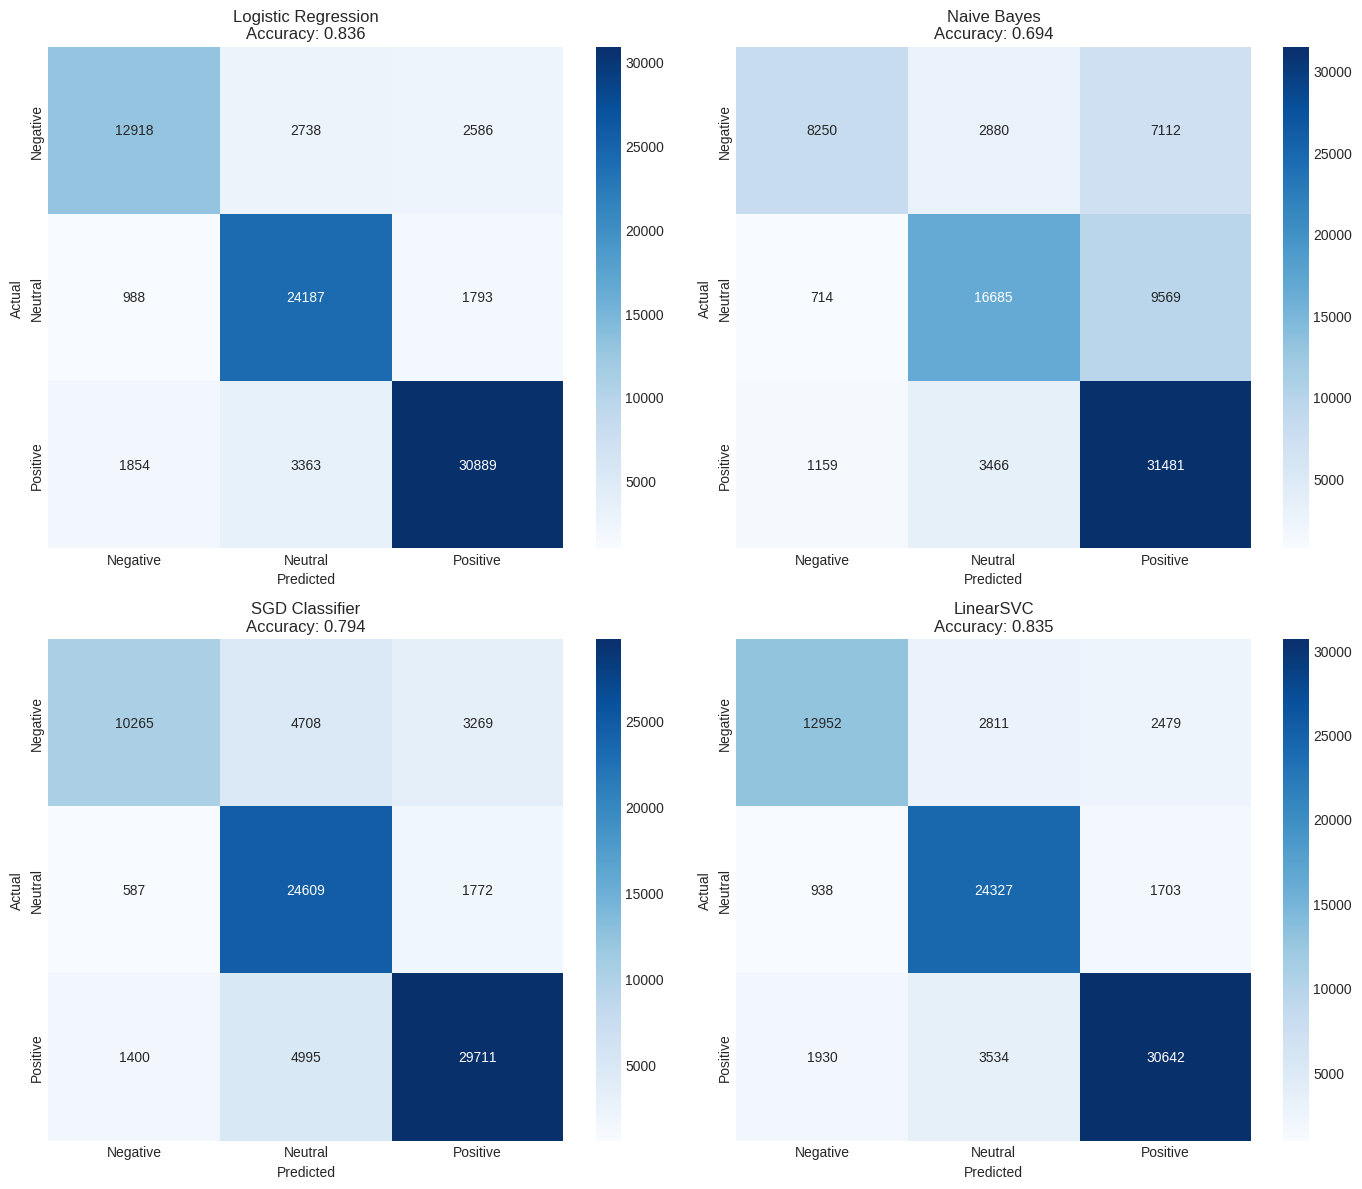

In [41]:
# Confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=target_names, yticklabels=target_names)
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_title(f'{name}\nAccuracy: {results[name]["Accuracy"]:.3f}')

plt.tight_layout()
plt.savefig('all_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 8. Model Saving (Pickle)

In [53]:
# Save the best model and vectorizer using pickle
print("Saving models...")

# Save the best model
with open('best_sentiment_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"Best model ({best_model_name}) saved as 'best_sentiment_model.pkl'")

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")

# Save all trained models
with open('all_trained_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)
print("All trained models saved as 'all_trained_models.pkl'")

# Save model results
results_df.to_csv('model_results.csv')
print("Model results saved as 'model_results.csv'")

print("\nAll models saved successfully!")

Saving models...
Best model (Logistic Regression) saved as 'best_sentiment_model.pkl'
TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'
All trained models saved as 'all_trained_models.pkl'
Model results saved as 'model_results.csv'

All models saved successfully!


In [43]:
# Verify saved models by loading them
print("Verifying saved models...")

# Load the model
with open('best_sentiment_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Test prediction
test_text = "This is a great product! I love it!"
test_processed = preprocess_text(test_text)
test_tfidf = loaded_vectorizer.transform([test_processed])
prediction = loaded_model.predict(test_tfidf)

print(f"Test text: '{test_text}'")
print(f"Prediction: {target_names[prediction[0]]}")
print("\n✓ Models loaded and verified successfully!")

Verifying saved models...
Test text: 'This is a great product! I love it!'
Prediction: Positive

✓ Models loaded and verified successfully!


---
## 9. User Input Prediction System

In [44]:
def predict_sentiment(text, model=None, vectorizer=None):
    """
    Predict sentiment for a given text input

    Parameters:
    -----------
    text : str
        Input text to analyze
    model : trained model (optional)
        If None, loads from pickle file
    vectorizer : trained vectorizer (optional)
        If None, loads from pickle file

    Returns:
    --------
    dict : Contains sentiment prediction and confidence scores
    """
    # Load model and vectorizer if not provided
    if model is None:
        with open('best_sentiment_model.pkl', 'rb') as f:
            model = pickle.load(f)

    if vectorizer is None:
        with open('tfidf_vectorizer.pkl', 'rb') as f:
            vectorizer = pickle.load(f)

    # Preprocess the input text
    cleaned_text = preprocess_text(text)

    # Transform to TF-IDF features
    text_tfidf = vectorizer.transform([cleaned_text])

    # Get prediction
    prediction = model.predict(text_tfidf)[0]

    # Get probability scores if available
    sentiment_labels = ['Negative', 'Neutral', 'Positive']

    try:
        probabilities = model.predict_proba(text_tfidf)[0]
        confidence_scores = dict(zip(sentiment_labels, probabilities))
    except:
        confidence_scores = None

    result = {
        'original_text': text,
        'cleaned_text': cleaned_text,
        'sentiment': sentiment_labels[prediction],
        'sentiment_code': prediction,
        'confidence_scores': confidence_scores
    }

    return result

print("Prediction function defined!")

Prediction function defined!


In [45]:
def display_prediction(result):
    """
    Display prediction results in a formatted manner
    """
    print("=" * 60)
    print("SENTIMENT PREDICTION RESULT")
    print("=" * 60)
    print(f"\nOriginal Text: {result['original_text']}")
    print(f"\nCleaned Text: {result['cleaned_text']}")
    print(f"\n{'='*30}")

    # Display sentiment with emoji
    sentiment_emoji = {
        'Negative': '😞',
        'Neutral': '😐',
        'Positive': '😊'
    }

    print(f"\nPredicted Sentiment: {result['sentiment']} {sentiment_emoji.get(result['sentiment'], '')}")

    if result['confidence_scores']:
        print(f"\nConfidence Scores:")
        for sentiment, score in result['confidence_scores'].items():
            bar = '█' * int(score * 20)
            print(f"  {sentiment:10s}: {score:.2%} {bar}")

    print("\n" + "=" * 60)

In [46]:
# Test with sample texts
sample_texts = [
    "I absolutely love this product! Best purchase ever!",
    "This is terrible. Worst experience I've ever had.",
    "It's okay, nothing special but not bad either.",
    "The service was amazing and the staff were very helpful!",
    "Very disappointed with the quality. Will not buy again."
]

print("Testing prediction system with sample texts:\n")

for text in sample_texts:
    result = predict_sentiment(text, loaded_model, loaded_vectorizer)
    display_prediction(result)
    print("\n")

Testing prediction system with sample texts:

SENTIMENT PREDICTION RESULT

Original Text: I absolutely love this product! Best purchase ever!

Cleaned Text: absolutely love product best purchase ever


Predicted Sentiment: Positive 😊

Confidence Scores:
  Negative  : 0.00% 
  Neutral   : 0.02% 
  Positive  : 99.98% ███████████████████



SENTIMENT PREDICTION RESULT

Original Text: This is terrible. Worst experience I've ever had.

Cleaned Text: terrible worst experience ive ever


Predicted Sentiment: Negative 😞

Confidence Scores:
  Negative  : 99.96% ███████████████████
  Neutral   : 0.04% 
  Positive  : 0.00% 



SENTIMENT PREDICTION RESULT

Original Text: It's okay, nothing special but not bad either.

Cleaned Text: okay nothing special bad either


Predicted Sentiment: Positive 😊

Confidence Scores:
  Negative  : 18.13% ███
  Neutral   : 1.11% 
  Positive  : 80.76% ████████████████



SENTIMENT PREDICTION RESULT

Original Text: The service was amazing and the staff were very helpf

In [52]:
# Interactive User Input Prediction
def interactive_prediction():
    """
    Interactive function for user to input text and get sentiment prediction
    """
    print("\n" + "="*60)
    print("INTERACTIVE SENTIMENT PREDICTION SYSTEM")
    print("="*60)
    print("\nEnter your text below to analyze its sentiment.")
    print("Type 'quit' or 'exit' to stop.\n")

    # Load model and vectorizer once
    with open('best_sentiment_model.pkl', 'rb') as f:
        model = pickle.load(f)
    with open('tfidf_vectorizer.pkl', 'rb') as f:
        vectorizer = pickle.load(f)

    while True:
        user_input = input("\nEnter text to analyze: ").strip()

        if user_input.lower() in ['quit', 'exit', 'q']:
            print("\nThank you for using the Sentiment Prediction System!")
            break

        if not user_input:
            print("Please enter some text.")
            continue

        result = predict_sentiment(user_input, model, vectorizer)
        display_prediction(result)

interactive_prediction()


INTERACTIVE SENTIMENT PREDICTION SYSTEM

Enter your text below to analyze its sentiment.
Type 'quit' or 'exit' to stop.


Enter text to analyze: The current movie is very bad
SENTIMENT PREDICTION RESULT

Original Text: The current movie is very bad

Cleaned Text: current movie bad


Predicted Sentiment: Negative 😞

Confidence Scores:
  Negative  : 97.17% ███████████████████
  Neutral   : 2.57% 
  Positive  : 0.26% 


Enter text to analyze: exit

Thank you for using the Sentiment Prediction System!
